In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('CustomerChurn.csv')

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [26]:
df.shape

(7043, 21)

In [27]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [28]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [44]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

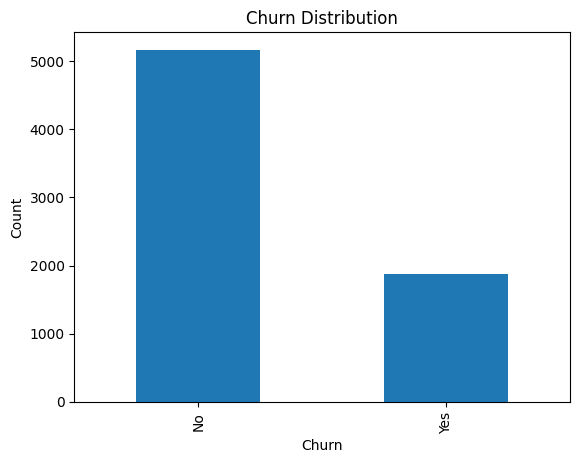

In [31]:
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

In [32]:
new_df=df.copy()

In [33]:
new_df.TotalCharges=pd.to_numeric(new_df.TotalCharges, errors='coerce') 
new_df.isnull().sum()   

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
new_df['TotalCharges'].loc[566]

np.float64(1667.25)

In [35]:
new_df['TotalCharges'].loc[new_df['TotalCharges'].isnull()==True]

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [36]:
# the percentage of missing values in TotalCharges is very low, so we can drop these rows
new_df.dropna(how='any', inplace=True)
new_df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
new_df['tenure'].max()
# new_df['tenure'].min()

np.int64(72)

In [38]:
# labels = ['1-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61-72 months']
# bins = [1, 12, 24, 36, 48, 60, 72]
# new_df['tenure_group'] = pd.cut(new_df['tenure'], bins=bins, labels=labels, right=False)
# new_df['tenure_group'].value_counts()
labels=["{0}-{1} ".format(i, i+11) for i in range(1, 72, 12)]
new_df['tenure_group'] = pd.cut(new_df['tenure'], bins=range(1, 80, 12), labels=labels, right=False)
new_df['tenure_group'].value_counts()

tenure_group
1-12      2175
61-72     1407
13-24     1024
25-36      832
49-60      832
37-48      762
Name: count, dtype: int64

In [39]:
#  dropping the customer id and  tenure column because they are not useful for our analysis
new_df.drop(['customerID', 'tenure'], axis=1, inplace=True)


Text(0.5, 1.0, 'Tenure Group Distribution')

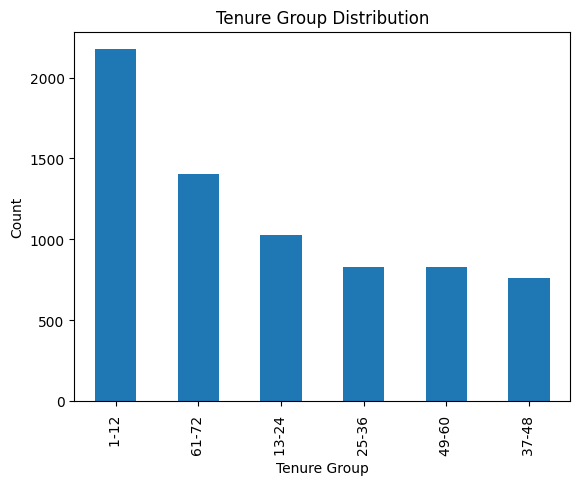

In [40]:
new_df['tenure_group'].value_counts().plot(kind='bar')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.title('Tenure Group Distribution')

In [41]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


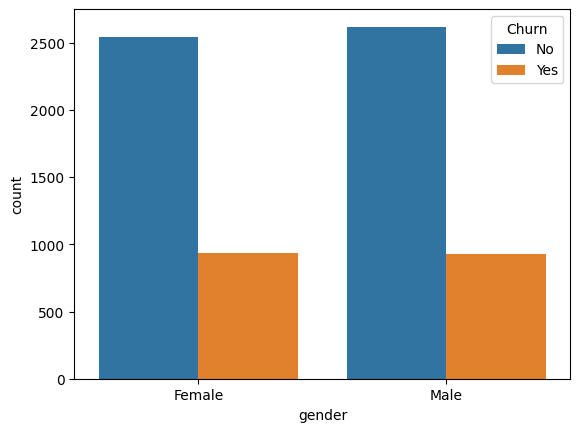

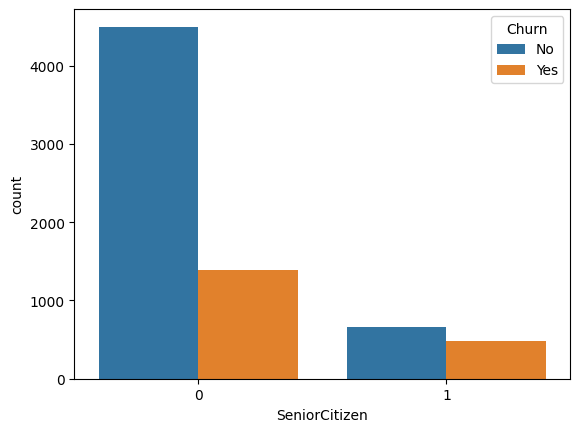

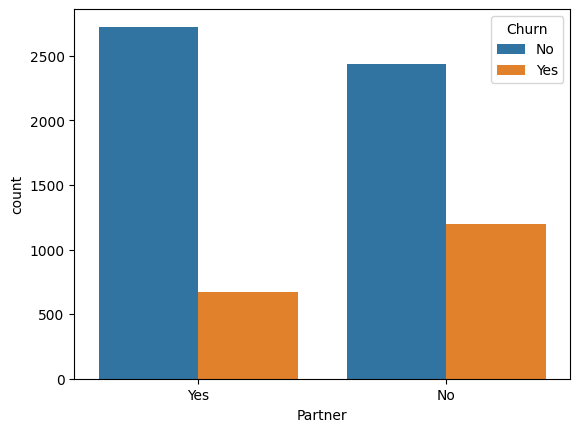

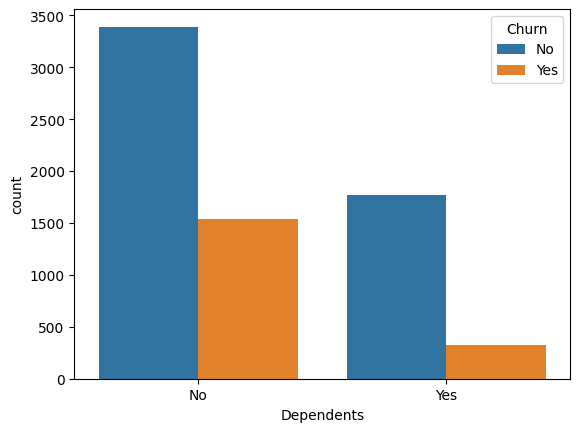

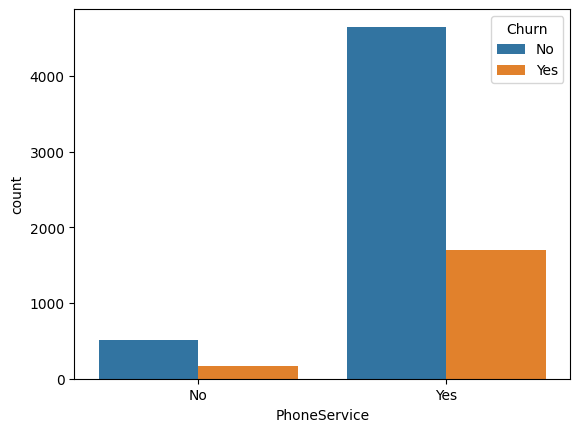

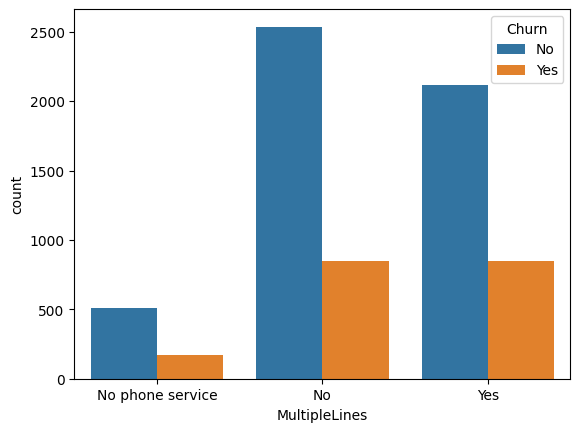

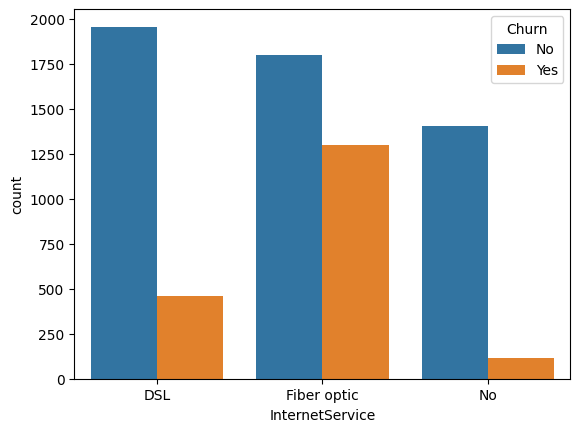

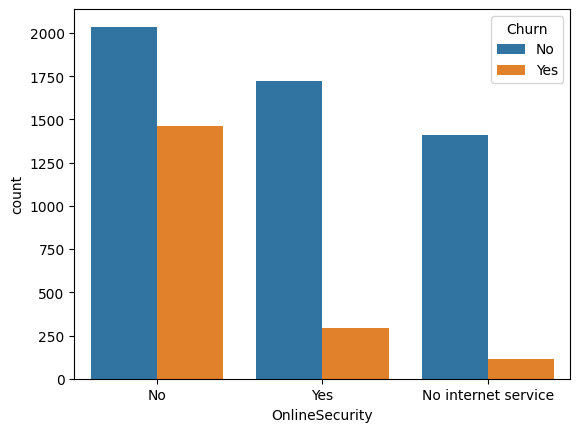

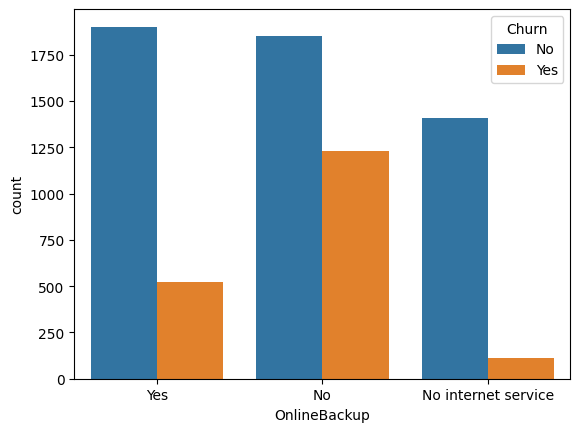

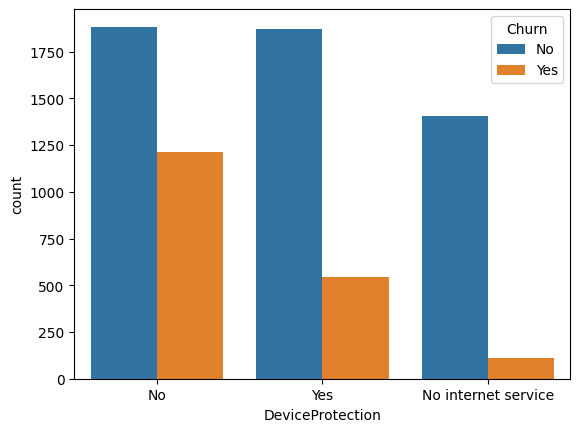

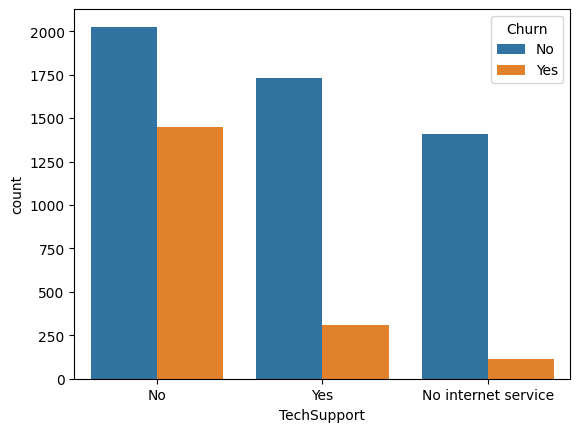

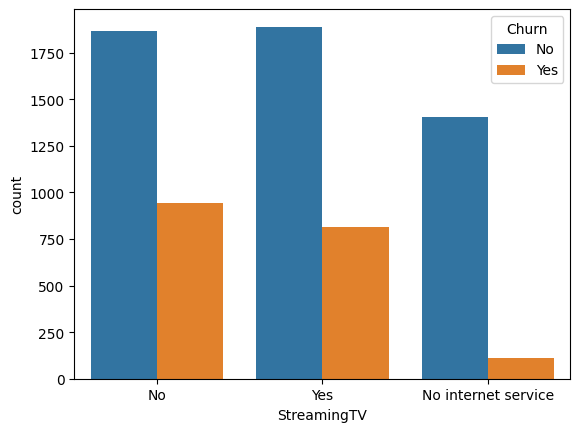

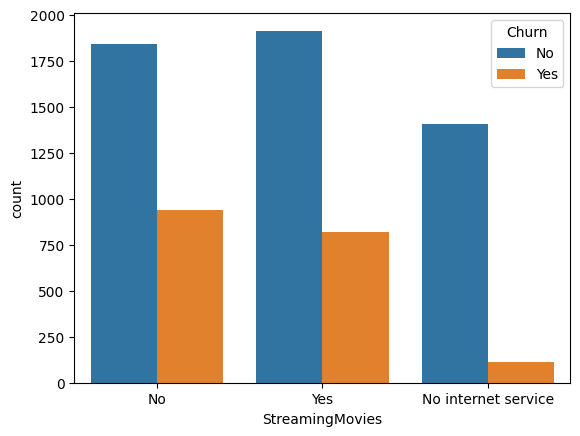

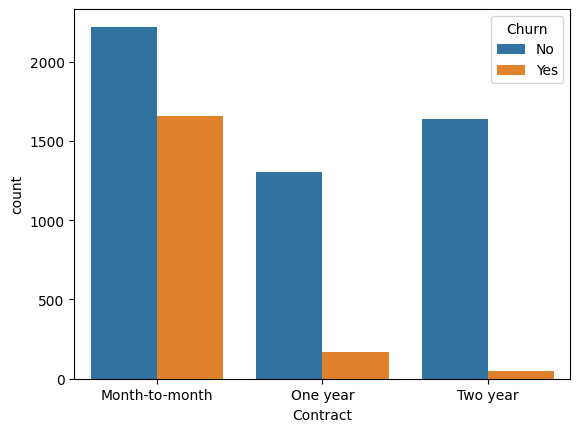

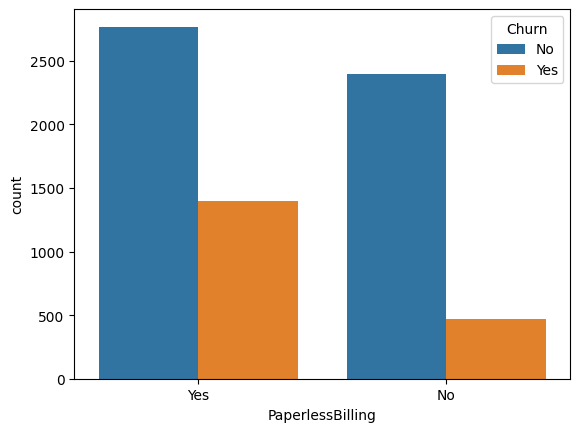

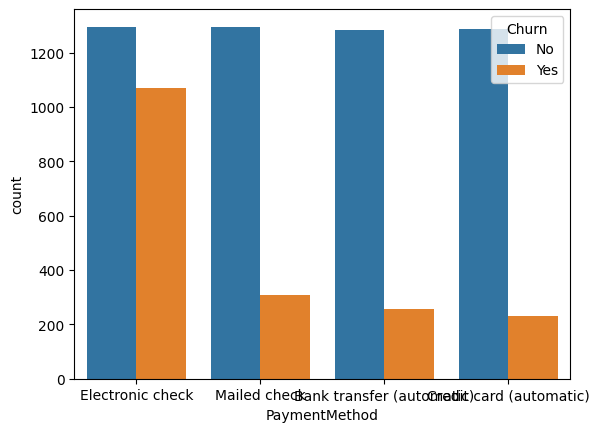

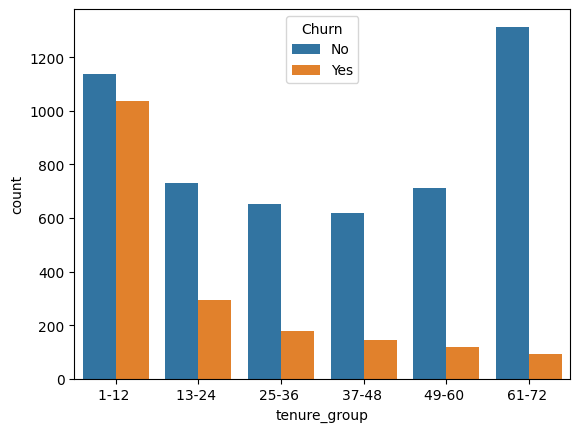

In [ ]:
#  univariate analysis
for i ,predictor in enumerate(new_df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df,x=predictor,hue="Churn")

Insight from graph
1.Senior citizen are more likely to churn
2. people with no partner are more likely to churn
3.monthly contacts are more likely to churn because they are free customer
4 . people who pay via electronic check are more likely to churn

In [45]:
# bivariate analysis
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [47]:
new_df1_target0 = new_df[new_df['Churn'] == 'No']
new_df1_target1 = new_df[new_df['Churn'] == "Yes"]
new_df1_target0.gender.value_counts()

gender
Male      2619
Female    2544
Name: count, dtype: int64

In [48]:
new_df1_target1.gender.value_counts()


gender
Female    939
Male      930
Name: count, dtype: int64

In [49]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [50]:
new_df['Churn']=np.where(new_df['Churn']=='Yes', 1, 0)
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [51]:
new_df_dummies= pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


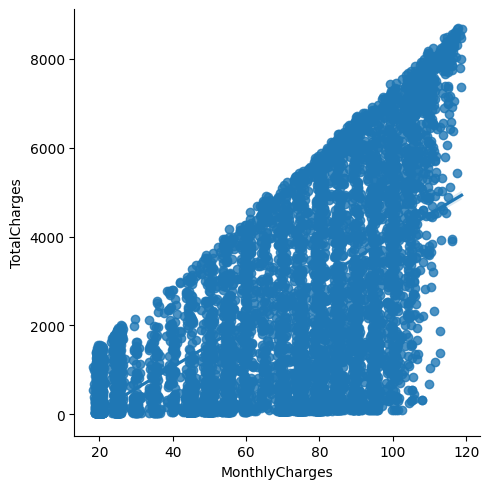

In [54]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=new_df_dummies )

In [55]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

np.float64(0.6510648032262027)

from here we get monthly charges and total charges are positively correlated

Text(0.5, 1.0, 'Monthly Charges Distribution by Churn Status')

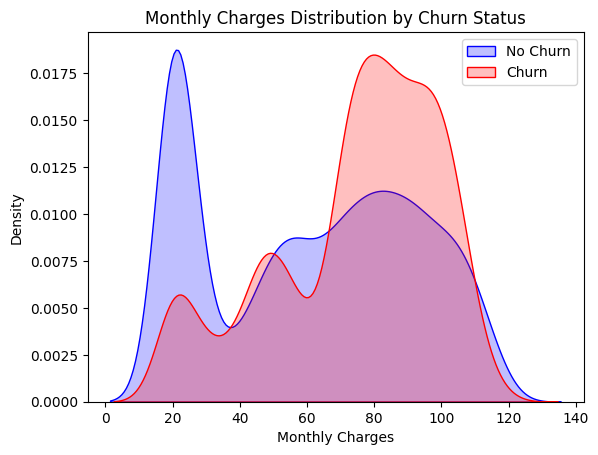

In [61]:
mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==0)], color='blue', fill=True )
mth=sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies['Churn']==1)], color='red', fill=True )
mth.legend(['No Churn', 'Churn'])
mth.set_xlabel('Monthly Charges')   
mth.set_ylabel('Density')
mth.set_title('Monthly Charges Distribution by Churn Status')

here more churn is happen when more monthly charge is taken

Text(0.5, 1.0, 'Correlation with Churn')

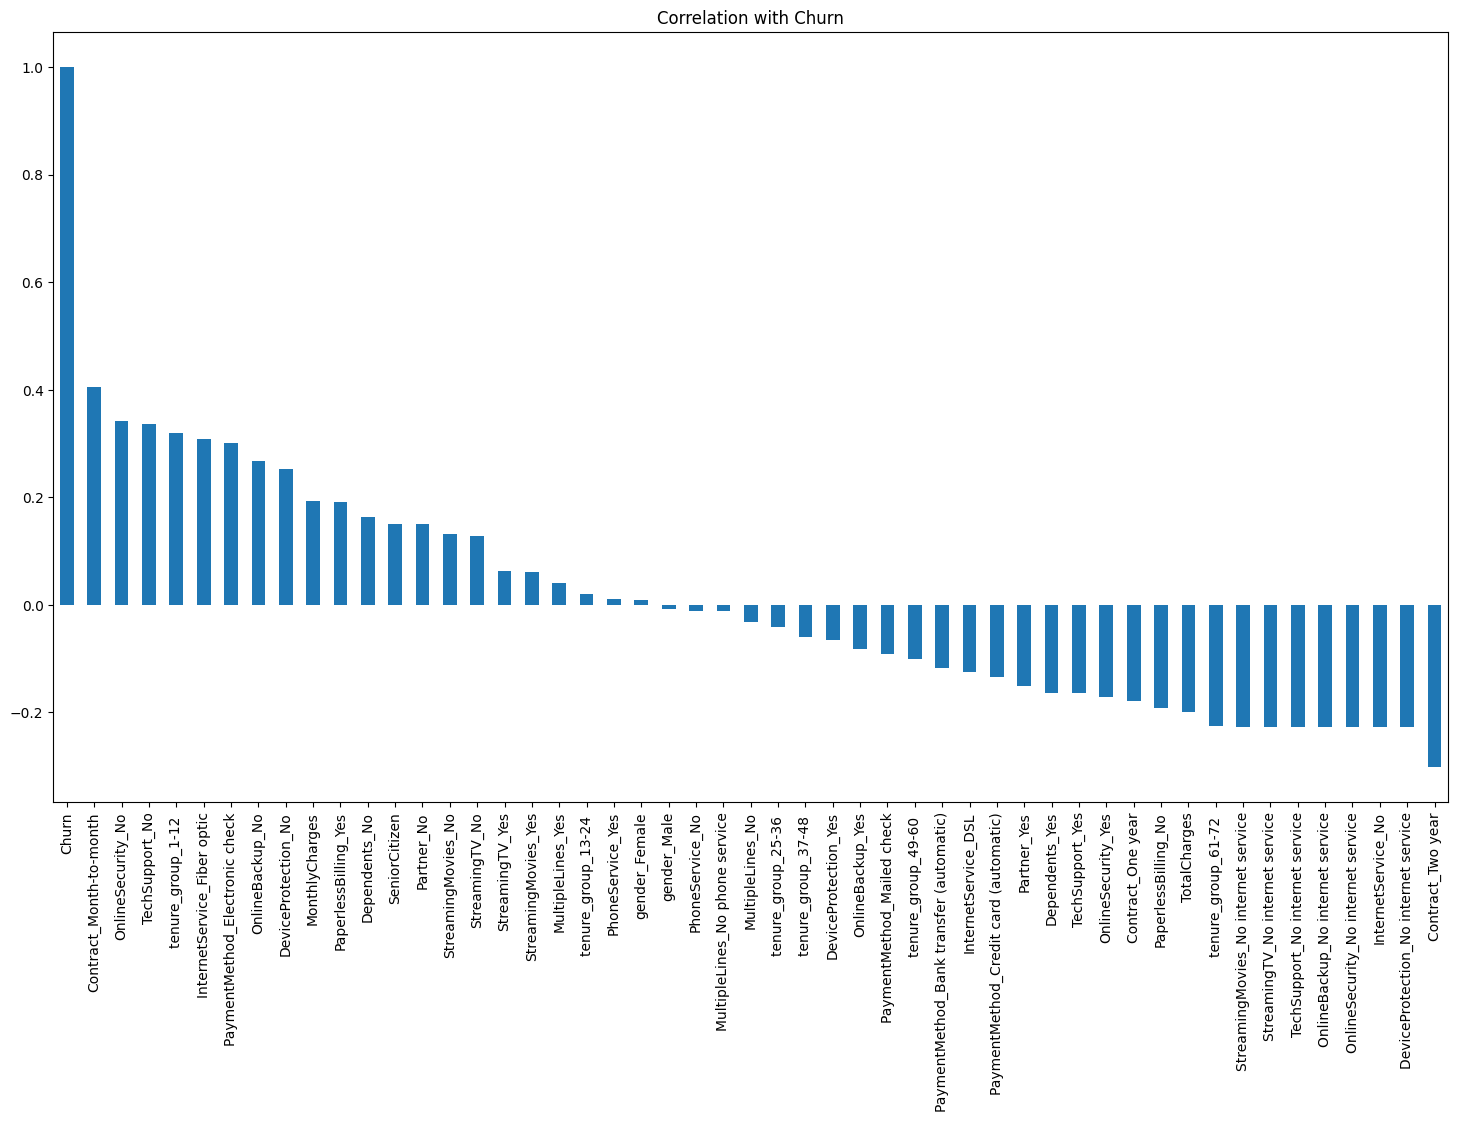

In [64]:
plt.figure(figsize=(18, 10))

new_df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Churn')

1.from this plot we can get that on online security  make high churn rate same as contact month to month as seen in graph
2. from last we can see that long term contract get low churn rate and so on